# Feature Engineering

In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def print_summary(df):
    display(df.info())
    display(df.head())

Resumen preliminar del dataframe inicial:

In [2]:
df = pd.read_csv('../data/raw/dataset.csv')
print_summary(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           241 non-null    int64  
 1   Area                 241 non-null    float64
 2   Perimeter            241 non-null    float64
 3   Convex Area          241 non-null    float64
 4   Solidity             241 non-null    float64
 5   Equivalent Diameter  241 non-null    float64
 6   Major Axis           241 non-null    float64
 7   Minor Axis           241 non-null    float64
 8   Eccentricity         241 non-null    object 
 9   Class                241 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 19.0+ KB


None

,Unnamed: 0,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


Elimino columna Unnamed: 0 ya que no agrega informacion (parece ser solo un indice):

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


Datos Faltantes (NULL o NAN): (No hay)

In [4]:
df.isnull().sum()

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Eccentricity           0
Class                  0
dtype: int64

In [5]:
df.isna().sum() 

Area                   0
Perimeter              0
Convex Area            0
Solidity               0
Equivalent Diameter    0
Major Axis             0
Minor Axis             0
Eccentricity           0
Class                  0
dtype: int64

Parece ser que hay 36 filas que solo tienen datos nulos:

In [6]:
(df == 0).sum()

Area                   36
Perimeter              36
Convex Area            36
Solidity               36
Equivalent Diameter    36
Major Axis             36
Minor Axis             36
Eccentricity            0
Class                  92
dtype: int64

Hago drop a las observaciones con todos los valores nulos:

In [7]:
df = df[df.Area != 0]
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,(8.439724311699382e-17+1.3783115780934465j),1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,(1.015395044877726e-16+1.6582659515946696j),1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,(8.176507178841775e-17+1.3353249581078526j),1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,(6.311037889163952e-17+1.0306707033502136j),1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,(8.50007943665633e-17+1.3881683180120858j),1


In [8]:
(df == 0).sum()

Area                    0
Perimeter               0
Convex Area             0
Solidity                0
Equivalent Diameter     0
Major Axis              0
Minor Axis              0
Eccentricity            0
Class                  65
dtype: int64

La columna Eccentricity tiene lo que parecen ser valores complejos. Voy a generar dos nuevas columnas llamadas Eccentricity_Real y Eccentricity_Imag para manejar valores flotantes y no strings.

In [9]:
df['Eccentricity_complex'] = df['Eccentricity'].apply(lambda x: complex(x))
df['Eccentricity_re'] = df['Eccentricity_complex'].apply(lambda x: x.real)
df['Eccentricity_im'] = df['Eccentricity_complex'].apply(lambda x: x.imag)

df.drop(['Eccentricity', 'Eccentricity_complex'], axis=1, inplace=True)

In [10]:
df = df[[col for col in df.columns if col != 'Class'] + ['Class']]

In [11]:
df.head()

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity_re,Eccentricity_im,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,8.439724e-17,1.378312,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.015395e-16,1.658266,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,8.176507e-17,1.335325,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,6.311038e-17,1.030671,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,8.500079e-17,1.388168,1


Normalizacion de variables numericas

In [12]:
numeric_variables = df[[col for col in df.columns if col != 'Class']].columns.to_list()
numeric_variables

['Area',
 'Perimeter',
 'Convex Area',
 'Solidity',
 'Equivalent Diameter',
 'Major Axis',
 'Minor Axis',
 'Eccentricity_re',
 'Eccentricity_im']

In [13]:
scaler = StandardScaler()
df_norm = df.copy()
df_norm[numeric_variables] = scaler.fit_transform(df_norm[numeric_variables])

In [15]:
df

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity_re,Eccentricity_im,Class
0,6314.5,521.972649,9855.5,0.640708,89.665328,86.297539,146.952896,8.439724e-17,1.378312,1
1,52776.5,1189.820409,59947.0,0.880386,259.224086,209.590240,405.861420,1.015395e-16,1.658266,1
2,50232.5,1415.349410,69628.5,0.721436,252.899200,223.632736,373.077637,8.176507e-17,1.335325,1
3,4486.0,275.622365,4741.5,0.946114,75.576138,64.818382,93.083397,6.311038e-17,1.030671,1
4,145.0,92.083260,323.5,0.448223,13.587484,16.900970,28.915043,8.500079e-17,1.388168,1
...,...,...,...,...,...,...,...,...,...,...
236,545.5,208.267025,1317.5,0.414042,26.354358,28.902472,64.973869,1.232836e-16,2.013375,0
237,902.0,232.166520,1444.5,0.624438,33.888967,30.549131,62.921772,1.102578e-16,1.800646,0
238,3177.0,217.681239,3260.0,0.974540,63.600959,63.508198,66.241142,1.815595e-17,0.296509,0
239,6103.0,1208.631593,51259.5,0.119061,88.150899,280.000031,285.934113,1.267309e-17,0.206967,0


In [14]:
df_norm

,Area,Perimeter,Convex Area,Solidity,Equivalent Diameter,Major Axis,Minor Axis,Eccentricity_re,Eccentricity_im,Class
0,-0.101430,-0.038787,-0.181931,0.049982,0.131398,-0.212951,-0.107047,-0.182289,-0.182289,1
1,0.434666,0.886566,0.335971,0.846629,1.579220,0.361194,0.158751,-0.070154,-0.070154,1
2,0.405312,1.199053,0.436069,0.318307,1.525213,0.426586,0.125095,-0.199508,-0.199508,1
3,-0.122528,-0.380124,-0.234805,1.065098,0.011094,-0.312974,-0.162350,-0.321537,-0.321537,1
4,-0.172616,-0.634431,-0.280483,-0.589806,-0.518213,-0.536114,-0.228226,-0.178341,-0.178341,1
...,...,...,...,...,...,...,...,...,...,...
236,-0.167995,-0.473450,-0.270206,-0.703417,-0.409199,-0.480226,-0.191207,0.072085,0.072085,0
237,-0.163882,-0.440336,-0.268893,-0.004099,-0.344863,-0.472558,-0.193314,-0.013123,-0.013123,0
238,-0.137632,-0.460406,-0.250123,1.159580,-0.091159,-0.319076,-0.189906,-0.615605,-0.615605,0
239,-0.103871,0.912630,0.246150,-1.683882,0.118467,0.689075,0.035633,-0.651471,-0.651471,0


<Axes: >

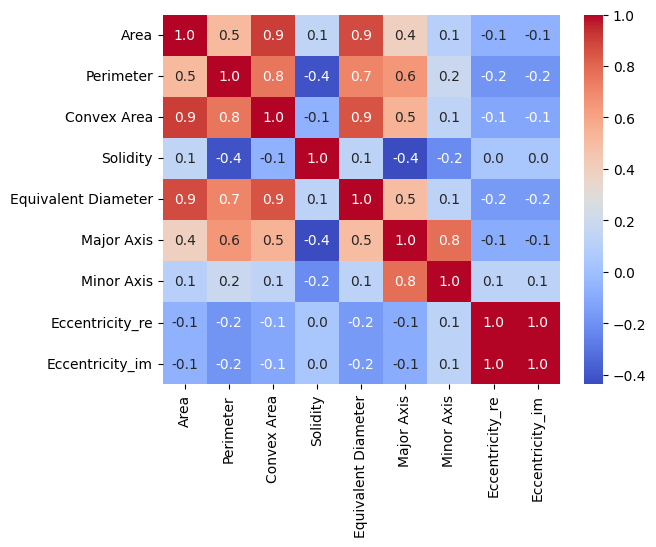

In [16]:
sns.heatmap(df[numeric_variables].corr(), annot=True, fmt=".1f", cmap='coolwarm')
# chequear que la normalizacion no cambia las correlaciones

<Axes: >

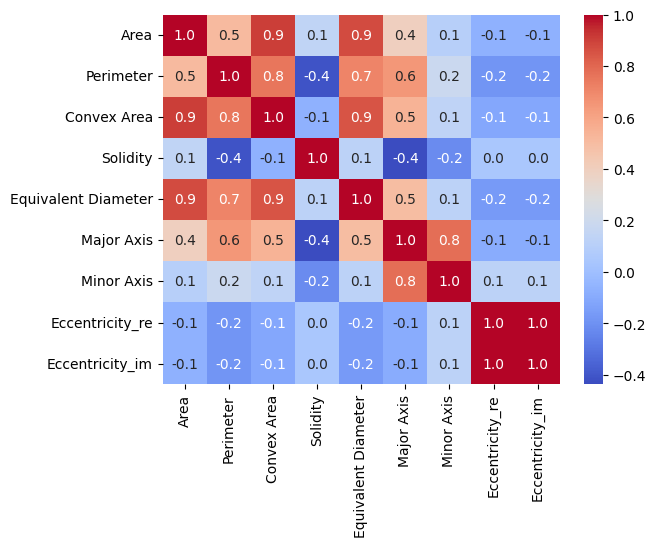

In [17]:
sns.heatmap(df_norm[numeric_variables].corr(), annot=True, fmt=".1f", cmap='coolwarm')
# chequear que la normalizacion no cambia las correlaciones

Box cox

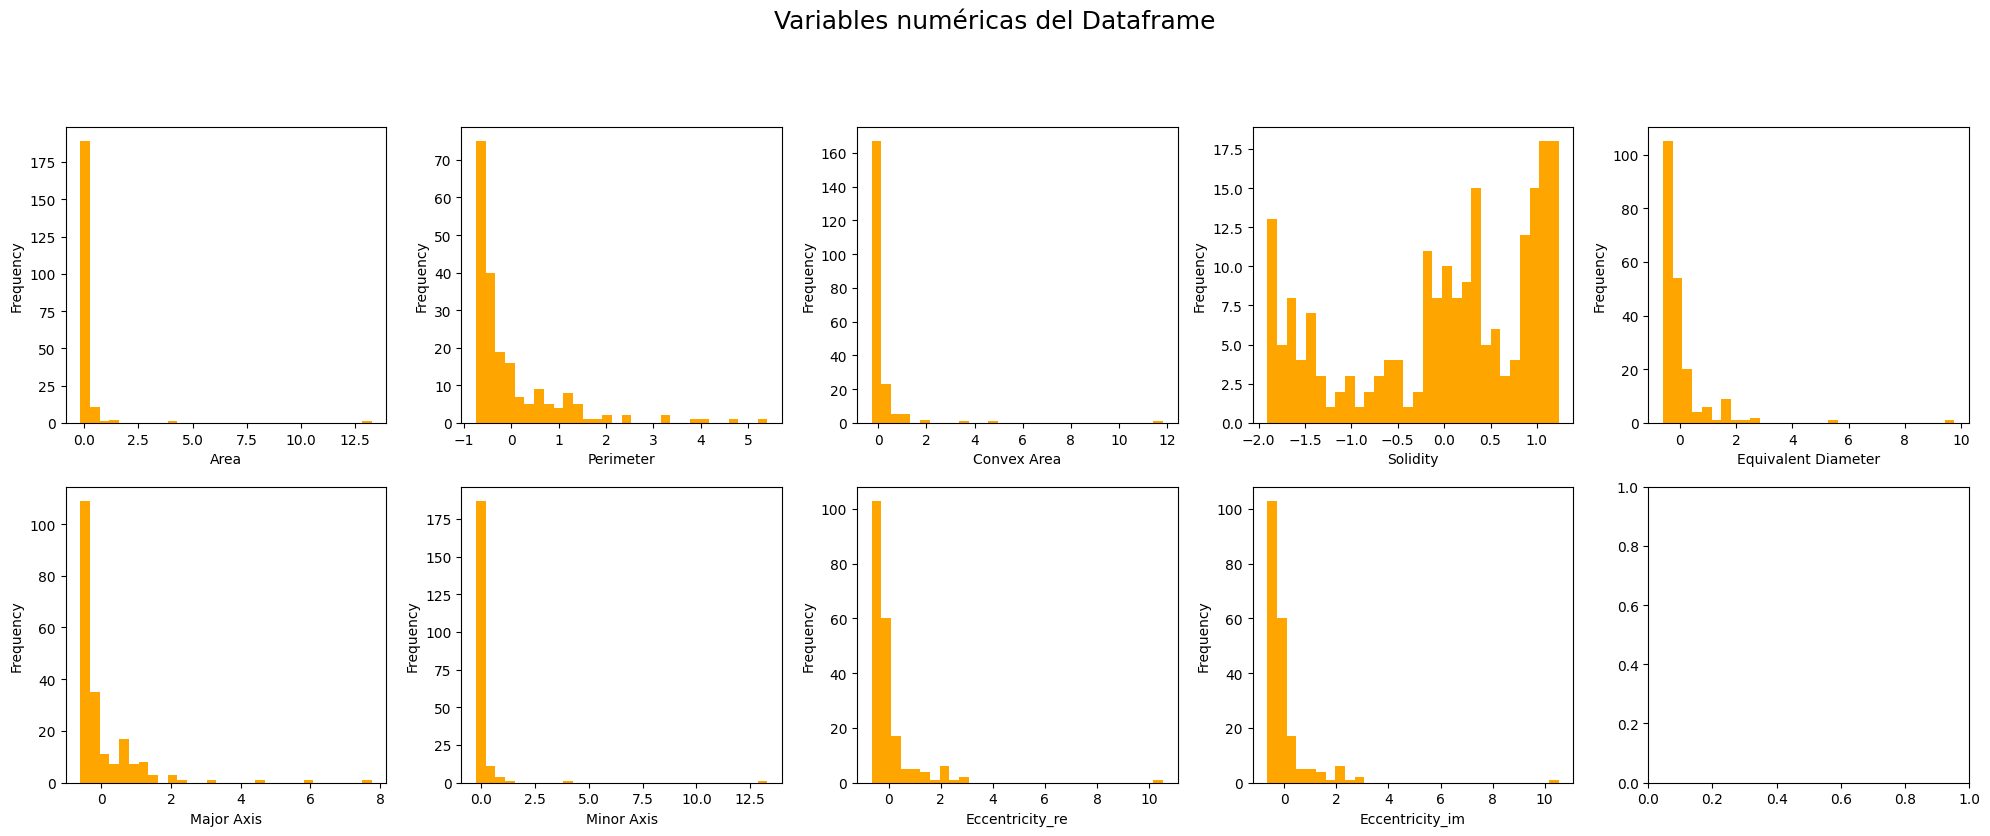

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,8), ncols=5, nrows=2)

fig.suptitle('Variables numéricas del Dataframe', fontsize=18, y = 1.04)

num_bins = 30

for i, var in enumerate(numeric_variables):
    row, col = divmod(i, 5)  # Calculate row and column indices
    df[var].plot.hist(bins=num_bins, x=var, ax=ax[row][col], color='orange')
    
    # Set x and y labels
    ax[row][col].set_xlabel(var)
    ax[row][col].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the title
plt.show()

Guardamos archivo con processing hecho

In [24]:
df.to_csv('../data/processed/processed_train.csv', index=False)